In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import warnings 
warnings.filterwarnings('ignore')

In [2]:
bank=pd.read_csv("bank_marketing_part1_Data.csv")

In [3]:
bank.shape

(210, 7)

In [4]:
bank.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [7]:
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
bank.duplicated().sum()

0

In [9]:
bank.min_payment_amt.skew(skipna = True)

0.40166734329025183

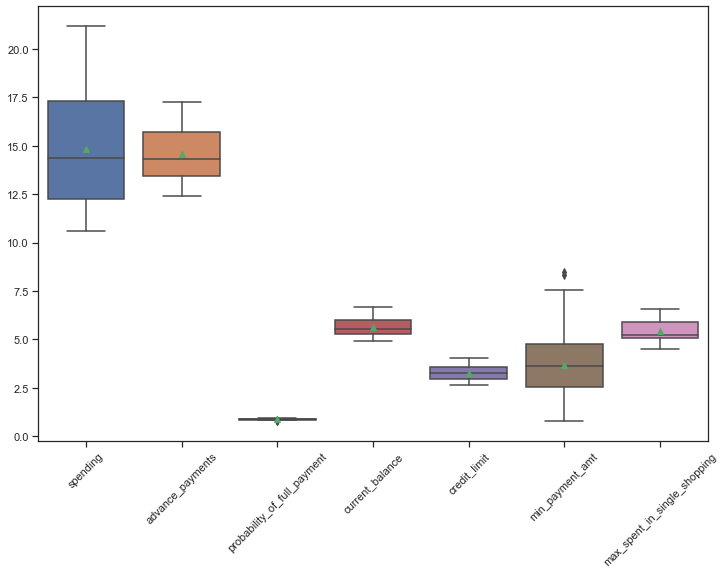

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=bank,showmeans=True)
plt.xticks(rotation=45);

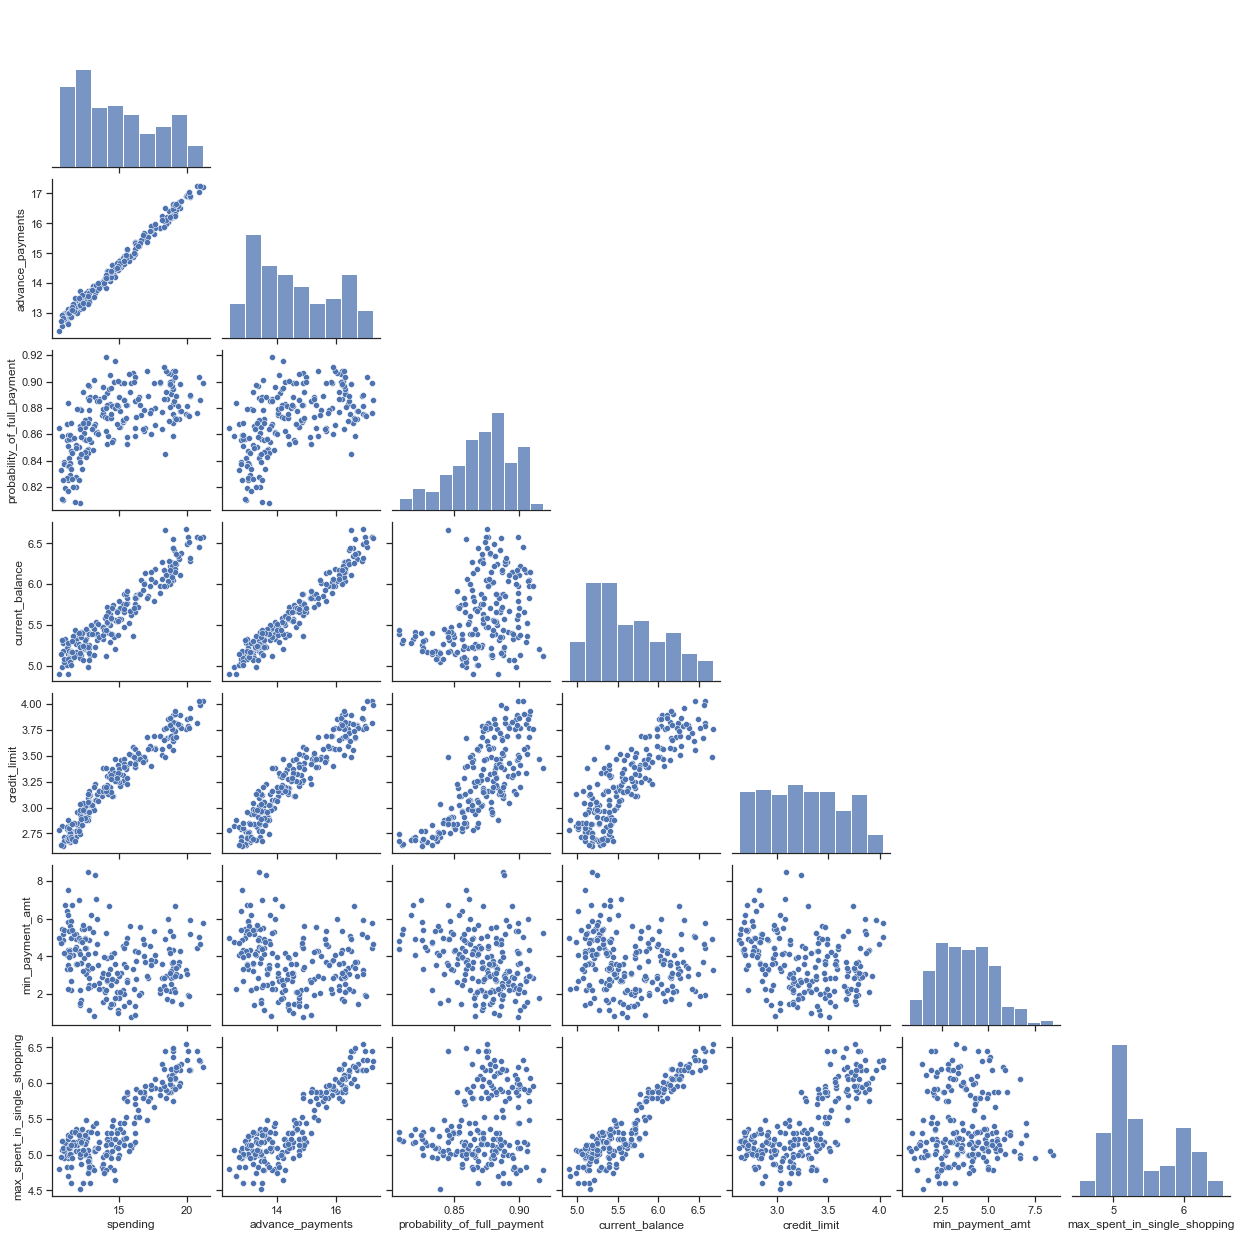

In [11]:
sns.pairplot(bank,corner=True)

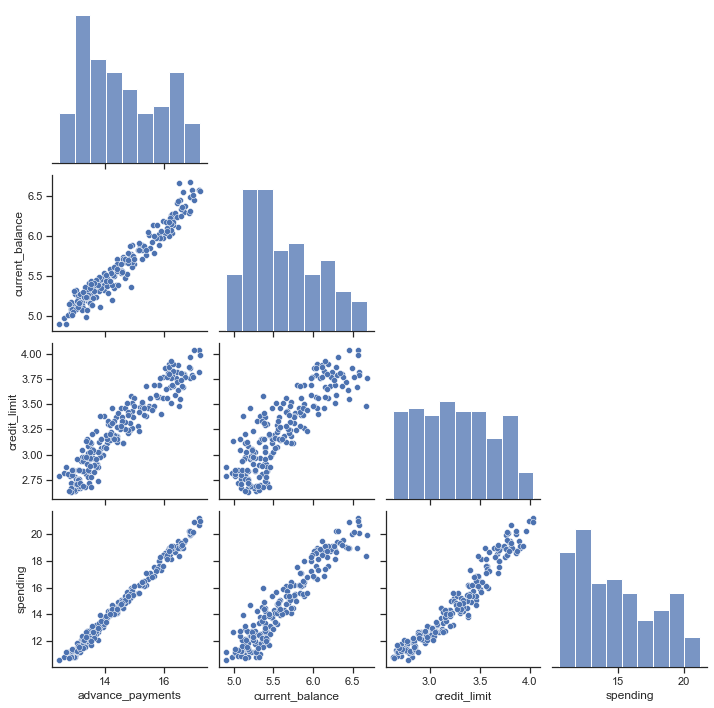

In [12]:
sns.pairplot(bank[['advance_payments','current_balance','credit_limit','spending']],corner=True)

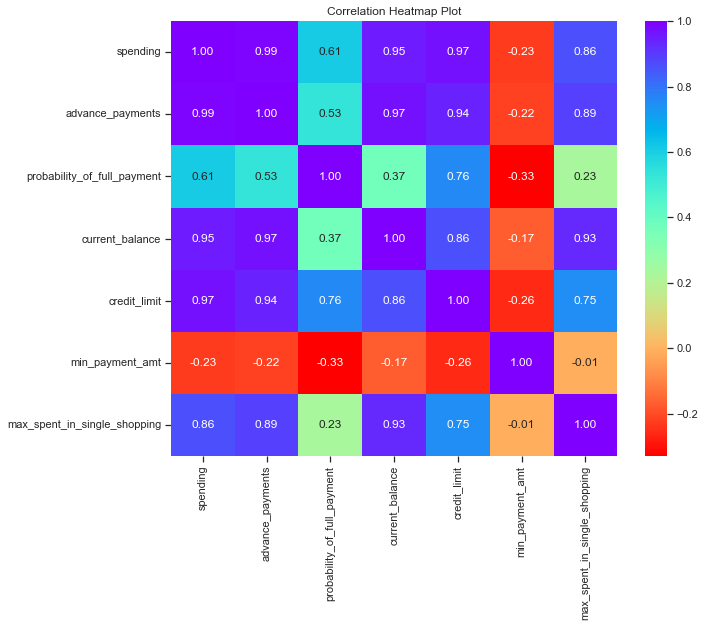

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(round(bank.corr(),2),fmt='.2f',annot=True,cmap='rainbow_r')
plt.title('Correlation Heatmap Plot')
plt.show()

In [14]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(bank[column].describe(),end=' ')
    
    print('\n')
    print("Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(round (bank[column].skew(skipna=True),2),end=' ')    
    plt.figure()
    mean = bank[column].mean()
    median = bank[column].median()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(bank[column], kde=True, color='g')
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median, color='b', linestyle='--');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=bank[column])
    plt.show()

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 

Skewness of spending
----------------------------------------------------------------------------
0.4 Distribution of spending
----------------------------------------------------------------------------


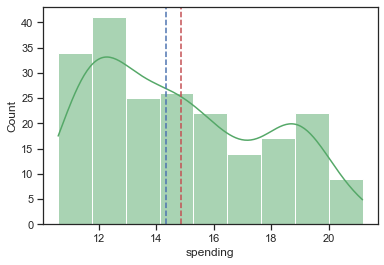

BoxPlot of spending
----------------------------------------------------------------------------


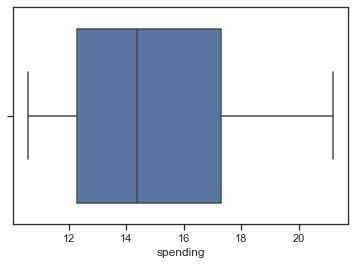

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 

Skewness of advance_payments
----------------------------------------------------------------------------
0.39 Distribution of advance_payments
----------------------------------------------------------------------------


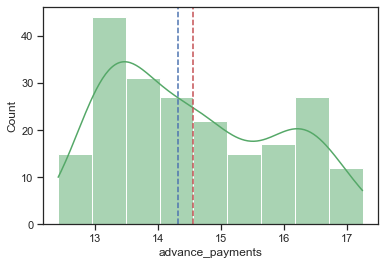

BoxPlot of advance_payments
----------------------------------------------------------------------------


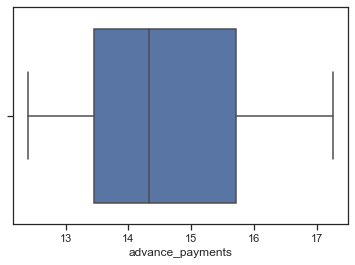

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 

Skewness of probability_of_full_payment
----------------------------------------------------------------------------
-0.54 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


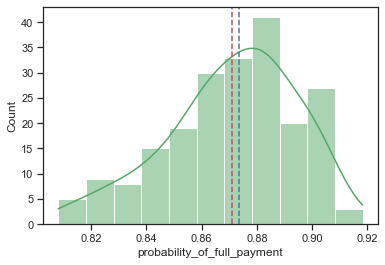

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


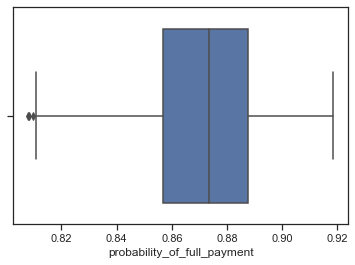

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 

Skewness of current_balance
----------------------------------------------------------------------------
0.53 Distribution of current_balance
----------------------------------------------------------------------------


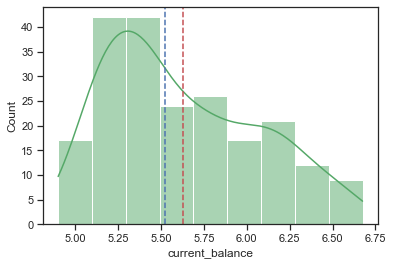

BoxPlot of current_balance
----------------------------------------------------------------------------


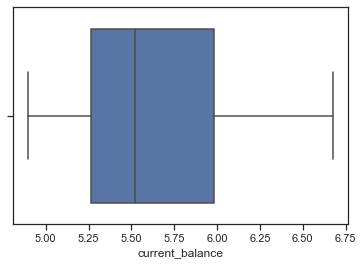

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 

Skewness of credit_limit
----------------------------------------------------------------------------
0.13 Distribution of credit_limit
----------------------------------------------------------------------------


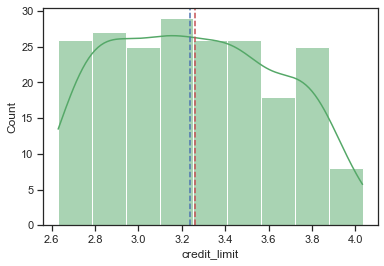

BoxPlot of credit_limit
----------------------------------------------------------------------------


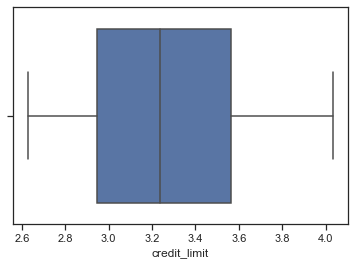

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 

Skewness of min_payment_amt
----------------------------------------------------------------------------
0.4 Distribution of min_payment_amt
----------------------------------------------------------------------------


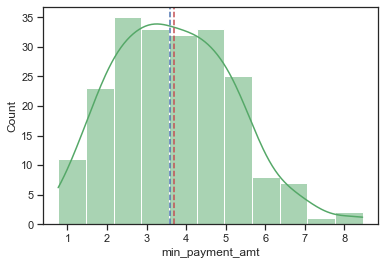

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


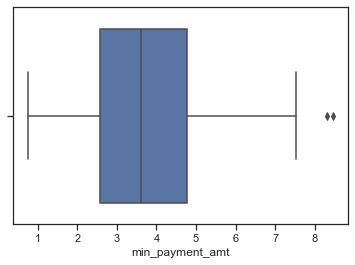

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 

Skewness of max_spent_in_single_shopping
----------------------------------------------------------------------------
0.56 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


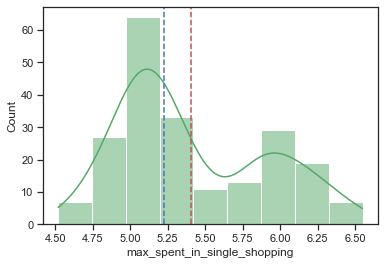

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


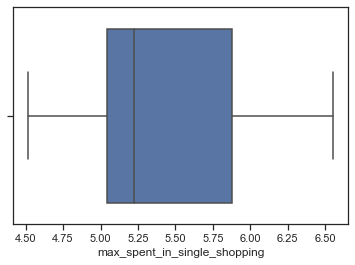

In [15]:
allcolumns=list(bank.columns.values)
for x in allcolumns:
    univariateAnalysis_numeric(x,50)

In [16]:
bank1=bank

In [17]:
bank_k=bank

In [18]:
bank1['spending']=bank['spending']*1000
bank1['advance_payments']=bank['advance_payments']*100
bank1['current_balance']=bank['current_balance']*1000
bank1['credit_limit']=bank['credit_limit']*10000
bank1['min_payment_amt']=bank['min_payment_amt']*100
bank1['max_spent_in_single_shopping']=bank['max_spent_in_single_shopping']*1000

In [19]:
bank1.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14847.523810,2909.699431,10590.0000,12270.0000,14355.00000,17305.000000,21180.0000
advance_payments,210.0,1455.928571,130.595873,1241.0000,1345.0000,1432.00000,1571.500000,1725.0000
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.8569,0.87345,0.887775,0.9183
current_balance,210.0,5628.533333,443.063478,4899.0000,5262.2500,5523.50000,5979.750000,6675.0000
credit_limit,210.0,32586.047619,3777.144449,26300.0000,29440.0000,32370.00000,35617.500000,40330.0000
min_payment_amt,210.0,370.020095,150.355713,76.5100,256.1500,359.90000,476.875000,845.6000
max_spent_in_single_shopping,210.0,5408.071429,491.480499,4519.0000,5045.0000,5223.00000,5877.000000,6550.0000


In [20]:
bank2=bank1

In [21]:
bank_scaled=bank1.apply(zscore)

In [22]:
bank_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [23]:
bank_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,1.340198e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,7.602384e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.243978e-15,1.002389,-2.668236,-0.598079,0.103993,0.711677,2.006586
current_balance,210.0,-9.828117e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,1.784948e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,7.031412e-17,1.002389,-1.956769,-0.759148,-0.067469,0.712379,3.170590
max_spent_in_single_shopping,210.0,2.891867e-16,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


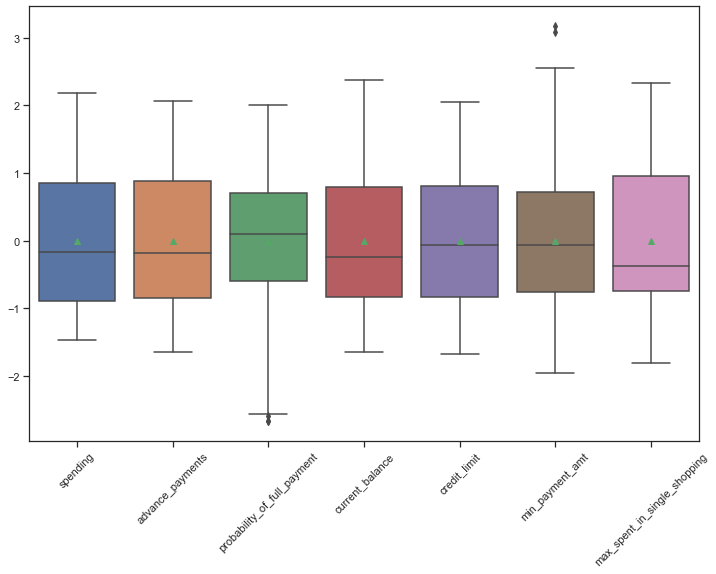

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=bank_scaled,showmeans=True)
plt.xticks(rotation=45);

In [25]:
link=linkage(bank_scaled.iloc[:,0:7],method='average')

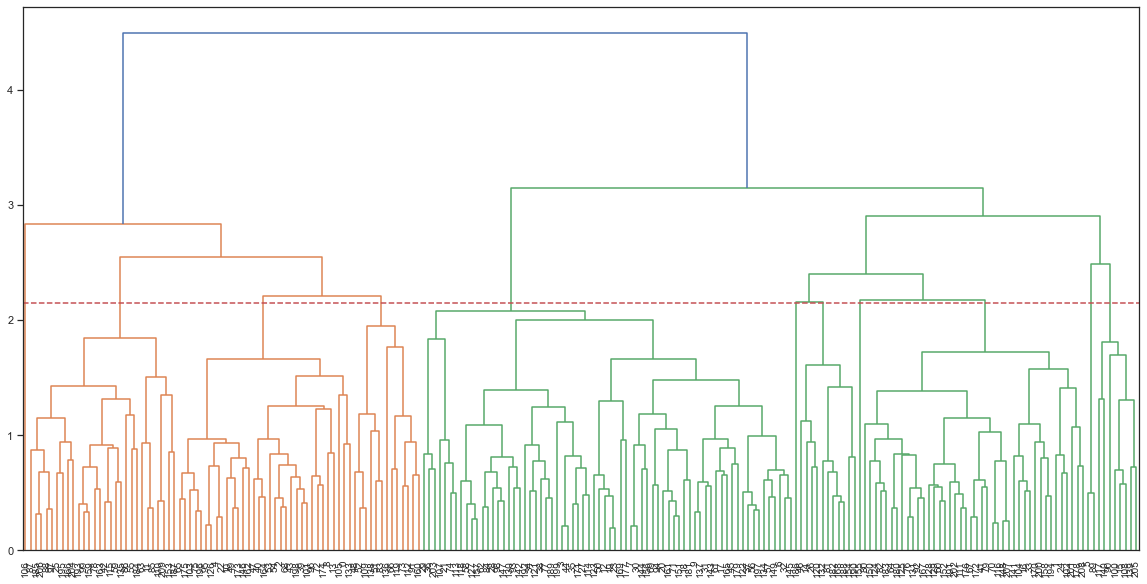

In [26]:
plt.figure(figsize=(20,10))
dend=dendrogram(link,leaf_rotation=90,leaf_font_size=10)
plt.axhline(y=2.15, color='r', linestyle='--')

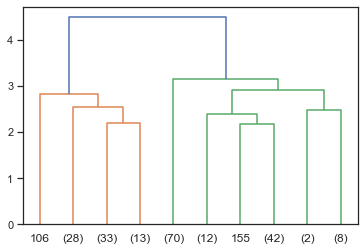

In [27]:
dend=dendrogram(link,truncate_mode='lastp',p=10)

In [28]:
clusters = fcluster(link, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [29]:
bank1['clusters'] = clusters
bank1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,3
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,2
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1


In [30]:
bank1.clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

In [31]:
clusters = fcluster(link, 3, criterion='distance')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [32]:
bank1['clusters'] = clusters
bank1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,3
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,2
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1


In [33]:
bank1.clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

In [34]:
aggdata=bank1.iloc[:,0:8].groupby('clusters').mean()
aggdata['Freq']=bank1.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18129.200000,1605.800000,0.881595,6135.746667,36481.200000,365.020000,5987.040000,75
2,11916.857143,1329.100000,0.846766,5258.300000,28460.000000,461.900000,5115.071429,70
3,14217.076923,1419.584615,0.884869,5442.000000,32535.076923,276.841846,5055.569231,65


In [35]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(bank_scaled.iloc[:,0:7])
print(Cluster_agglo)

[1 0 1 2 1 0 2 2 1 2 1 1 2 1 0 0 0 2 2 2 2 2 1 2 0 1 0 2 2 2 2 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 1 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 1 1 1 1 0 0 1 0 2 2 1 1 1 2 1 0 1 0 1 0 1 1 2 0 1 1
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 2 2 1 2
 0 2 0 2 0 1 0 0 2 2 0 1 1 2 1 1 1 2 1 0 0 2 0 2 0 1 1 1 0 2 0 2 0 2 0 0 1
 1 0 1 0 2 0 0 2 1 0 1 1 2 1 2 0 0 0 2 1 0 1 0 0 1]


In [36]:
bank1["Agg_Clust"]=Cluster_agglo

In [37]:
bank1.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'clusters', 'Agg_Clust'],
      dtype='object')

In [38]:
agglo_data=bank.drop(["clusters"],axis=1).groupby('Agg_Clust').mean()
agglo_data['Freq']=bank1.Agg_Clust.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agg_Clust,,,,,,,,
0,14217.076923,1419.584615,0.884869,5442.000000,32535.076923,276.841846,5055.569231,65
1,18129.200000,1605.800000,0.881595,6135.746667,36481.200000,365.020000,5987.040000,75
2,11916.857143,1329.100000,0.846766,5258.300000,28460.000000,461.900000,5115.071429,70


In [39]:
sc=StandardScaler()

In [40]:
bank_kscaled=sc.fit_transform(bank1.iloc[:,0:7])

In [41]:
bank_kscaled

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

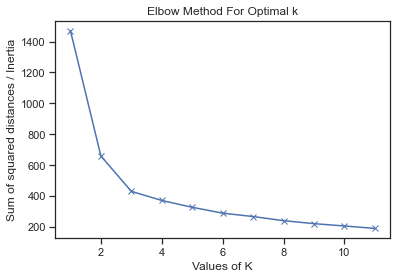

In [42]:
Sum_of_squared_distances = []
K = range(1,12)
for clusters in K:
    kmeans = KMeans(n_clusters=clusters,random_state=0)
    kmeans.fit(bank_kscaled)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances / Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [43]:
Sum_of_squared_distances

[1470.0000000000005,
 659.1717544870407,
 430.65897315130064,
 371.58119097155253,
 327.5038437438553,
 289.46717056412876,
 267.5489624840096,
 240.844366872305,
 221.55712182925916,
 206.49000739307598,
 190.72342206684706]

The Sum_of_squared_distances is : 659.1717544870407 ,Silhouette score is: 0.46577247686580914
The Sum_of_squared_distances is : 430.65897315130064 ,Silhouette score is: 0.40072705527512986
The Sum_of_squared_distances is : 371.58119097155253 ,Silhouette score is: 0.3369008229710853
The Sum_of_squared_distances is : 327.5038437438553 ,Silhouette score is: 0.2831393709868861
The Sum_of_squared_distances is : 289.46717056412876 ,Silhouette score is: 0.2903443931779972
The Sum_of_squared_distances is : 267.5489624840096 ,Silhouette score is: 0.2654070530884961
The Sum_of_squared_distances is : 240.844366872305 ,Silhouette score is: 0.25193918824703637
The Sum_of_squared_distances is : 221.55712182925916 ,Silhouette score is: 0.2555836756561569


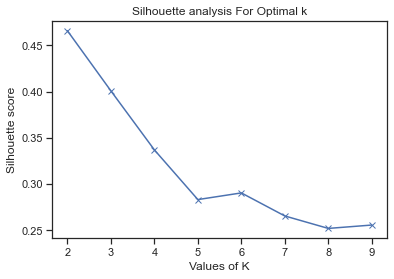

In [44]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9]
silhouette_avg = []
for i in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(bank_kscaled)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(bank_kscaled, cluster_labels,random_state=0))
    sils=silhouette_score(bank_kscaled, cluster_labels,random_state=0)
    print("The Sum_of_squared_distances is :",kmeans.inertia_, ",Silhouette score is:", sils)
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(bank_kscaled)
cluster_labels = kmeans.labels_
bank["Clus_km"] = cluster_labels
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agg_Clust,Clus_km
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1,1,2
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,3,0,0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1,1,2
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,2,2,1
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1,1,2


In [46]:
km_data=bank.drop(["clusters","Agg_Clust"],axis=1).groupby('Clus_km').mean()
km_data['Freq']=bank.Clus_km.value_counts().sort_index()
km_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Clus_km,,,,,,,,
0,14437.887324,1433.774648,0.881597,5514.577465,32592.253521,270.734085,5120.802817,71
1,11856.944444,1324.777778,0.848253,5231.750000,28495.416667,474.238889,5101.722222,72
2,18495.373134,1620.343284,0.884210,6175.686567,36975.373134,363.237313,6041.701493,67


In [47]:
bank_kscaled

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

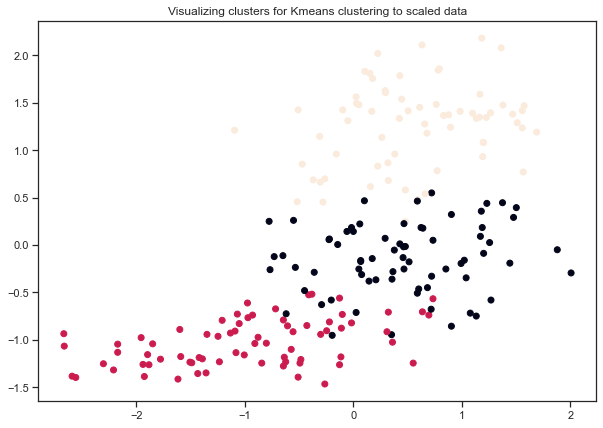

In [48]:
plt.figure(figsize=(10,7))
plt.scatter(x=bank_scaled['probability_of_full_payment'],y=bank_scaled['spending'],c=cluster_labels)
plt.title('Visualizing clusters for Kmeans clustering to scaled data');


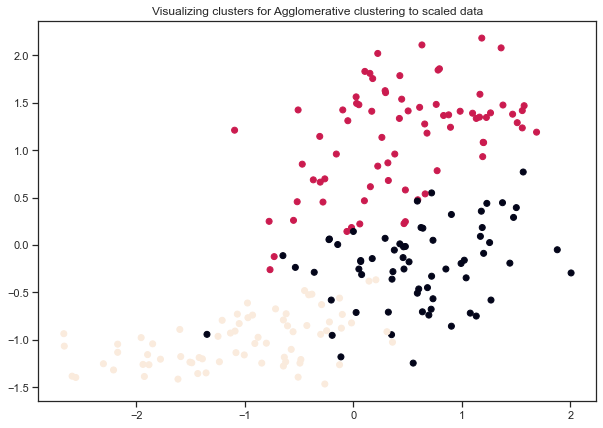

In [49]:
plt.figure(figsize=(10,7))
plt.scatter(x=bank_scaled['probability_of_full_payment'],y=bank_scaled['spending'],c=Cluster_agglo)
plt.title('Visualizing clusters for Agglomerative clustering to scaled data');

In [50]:
claim=pd.read_csv("insurance_part2_data.csv")

In [51]:
claim.rename(columns={'Product Name':'Product_Name'},inplace=True)

In [52]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product_Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [53]:
claim.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [54]:
claim.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [55]:
claim.shape

(3000, 10)

In [56]:
claim.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product_Name    0
Destination     0
dtype: int64

In [57]:
claim.duplicated().sum()

139

In [58]:
claim_dup=claim[claim.duplicated(keep='first')]

In [59]:
claim_nd=claim.drop_duplicates(keep='first')

In [60]:
claim_nd.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [61]:
claim_nd.shape

(2861, 10)

In [62]:
claim_nd.dtypes.value_counts()

object     6
int64      2
float64    2
dtype: int64

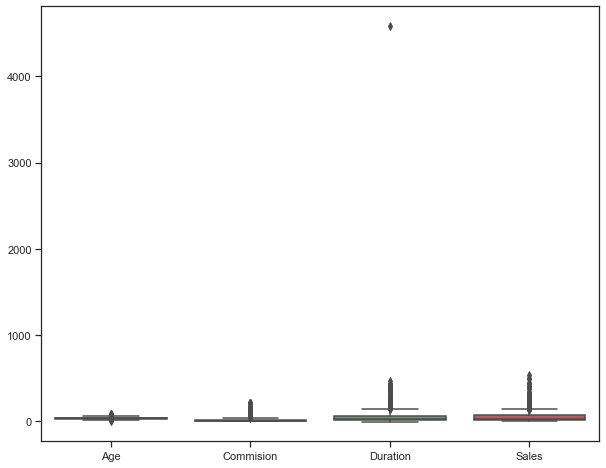

In [63]:
plt.figure(figsize=(10,8))
sns.boxplot(data=claim_nd);

In [64]:
def univariateAnalysis_numerics(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(claim_nd[column].describe(),end=' ')
    
    print('\n')
    print("Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(round (claim_nd[column].skew(skipna=True),2),end=' ')    
    plt.figure()
    mean = claim_nd[column].mean()
    median = claim_nd[column].median()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(claim_nd[column], kde=True, color='g')
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median, color='b', linestyle='--');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=claim_nd[column])
    plt.show()

Description of Age
----------------------------------------------------------------------------
count    2861.000000
mean       38.204124
std        10.678106
min         8.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        84.000000
Name: Age, dtype: float64 

Skewness of Age
----------------------------------------------------------------------------
1.1 Distribution of Age
----------------------------------------------------------------------------


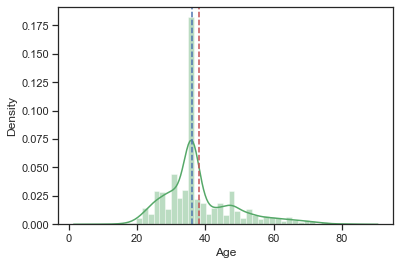

BoxPlot of Age
----------------------------------------------------------------------------


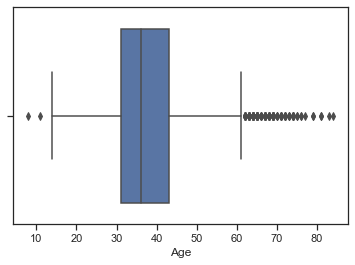

Description of Duration
----------------------------------------------------------------------------
count    2861.000000
mean       72.120238
std       135.977200
min        -1.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64 

Skewness of Duration
----------------------------------------------------------------------------
13.79 Distribution of Duration
----------------------------------------------------------------------------


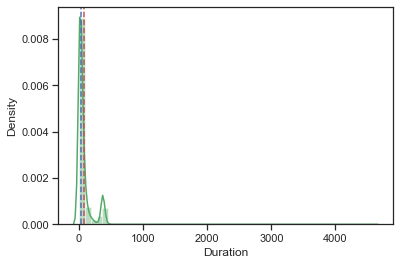

BoxPlot of Duration
----------------------------------------------------------------------------


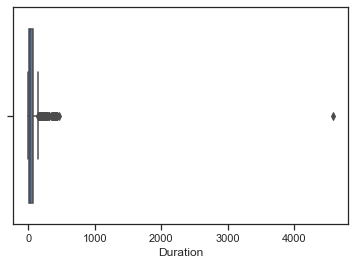

Description of Commision
----------------------------------------------------------------------------
count    2861.000000
mean       15.080996
std        25.826834
min         0.000000
25%         0.000000
50%         5.630000
75%        17.820000
max       210.210000
Name: Commision, dtype: float64 

Skewness of Commision
----------------------------------------------------------------------------
3.1 Distribution of Commision
----------------------------------------------------------------------------


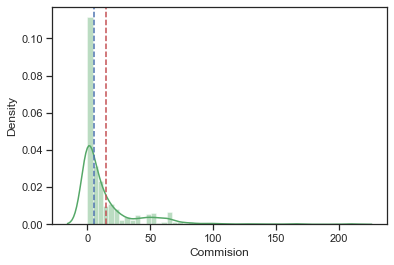

BoxPlot of Commision
----------------------------------------------------------------------------


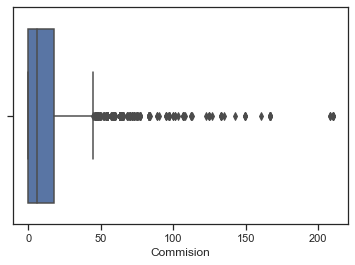

Description of Sales
----------------------------------------------------------------------------
count    2861.000000
mean       61.757878
std        71.399740
min         0.000000
25%        20.000000
50%        33.500000
75%        69.300000
max       539.000000
Name: Sales, dtype: float64 

Skewness of Sales
----------------------------------------------------------------------------
2.34 Distribution of Sales
----------------------------------------------------------------------------


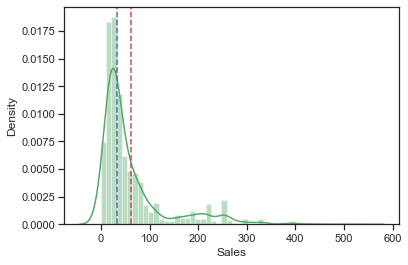

BoxPlot of Sales
----------------------------------------------------------------------------


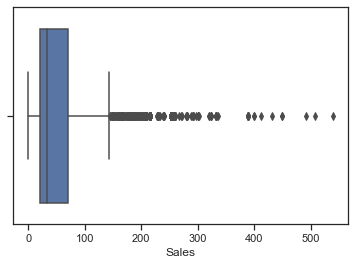

In [65]:
allcolumns=list(claim_nd[["Age","Duration","Commision","Sales"]])
for x in allcolumns:
    univariateAnalysis_numerics(x,5)

No     0.680531
Yes    0.319469
Name: Claimed, dtype: float64


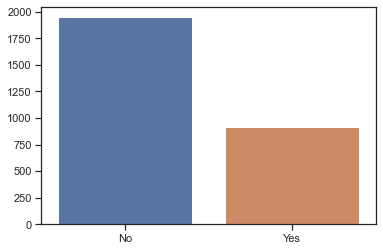

In [66]:
sns.barplot(claim_nd.Claimed.value_counts().index,claim_nd.Claimed.value_counts().values);
print(claim_nd.Claimed.value_counts(normalize=True))

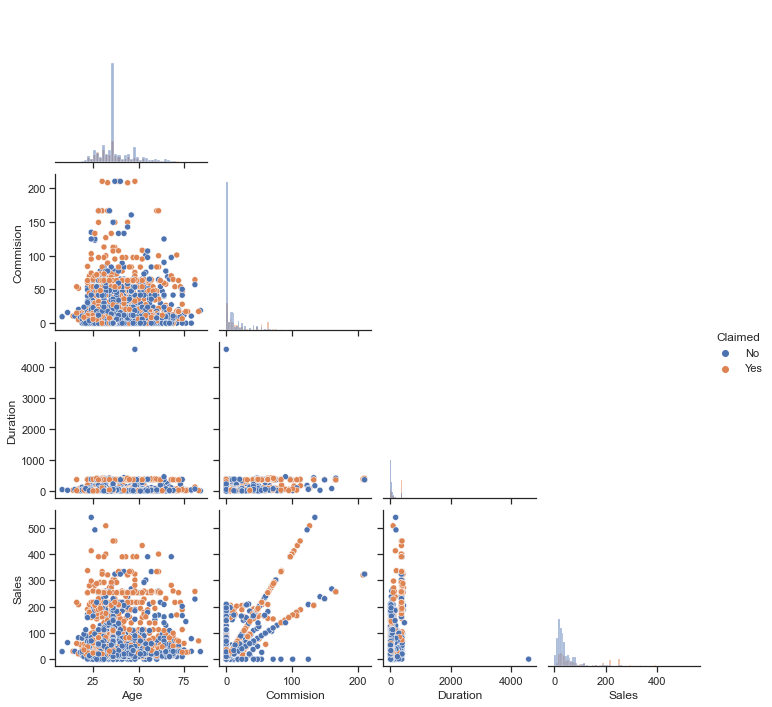

In [67]:
sns.pairplot(claim_nd,diag_kind='hist',corner=True,hue='Claimed');

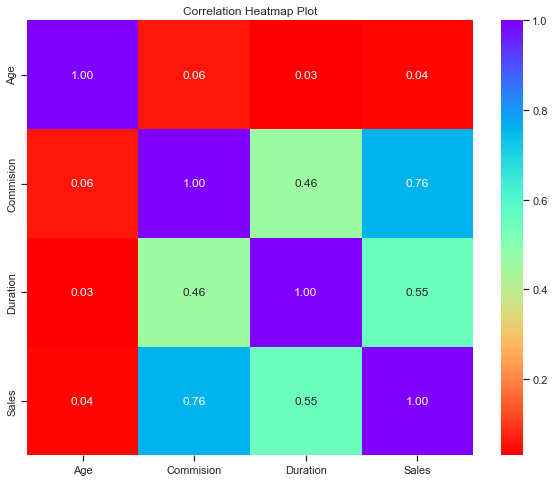

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(round(claim_nd.corr(),2),fmt='.2f',annot=True,cmap='rainbow_r')
plt.title('Correlation Heatmap Plot')
plt.show()

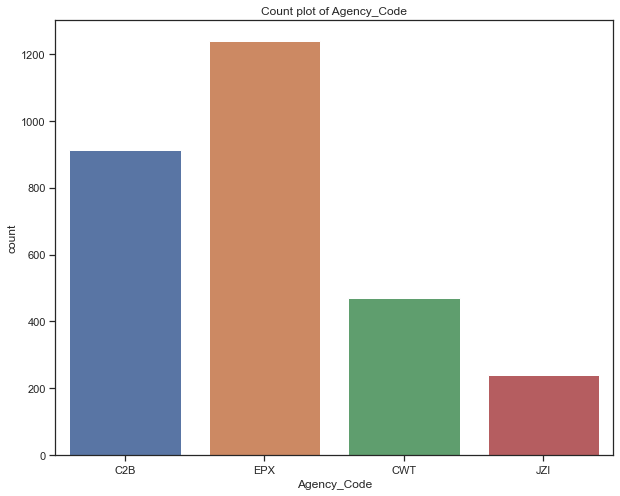

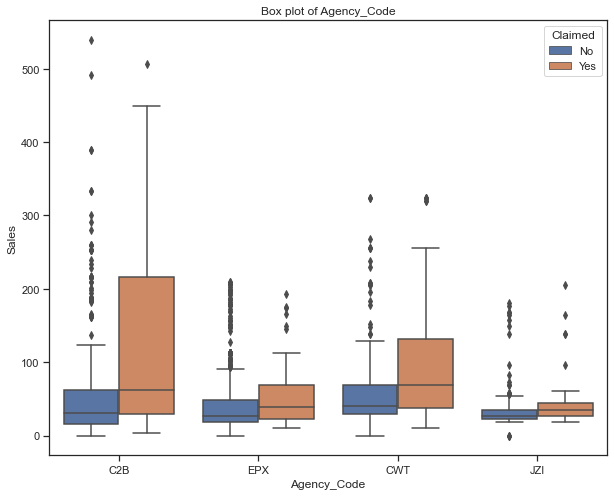

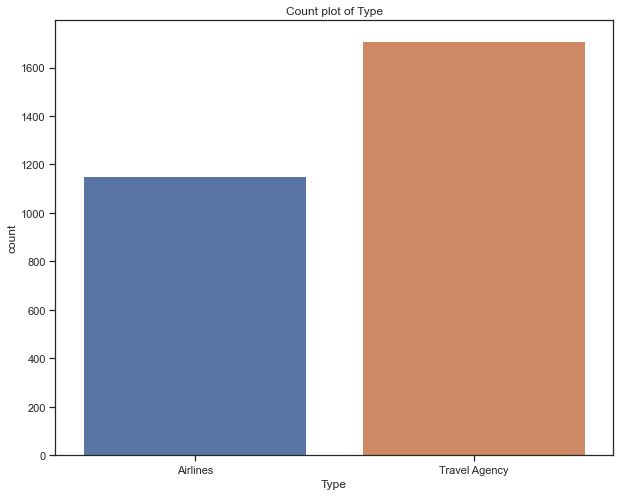

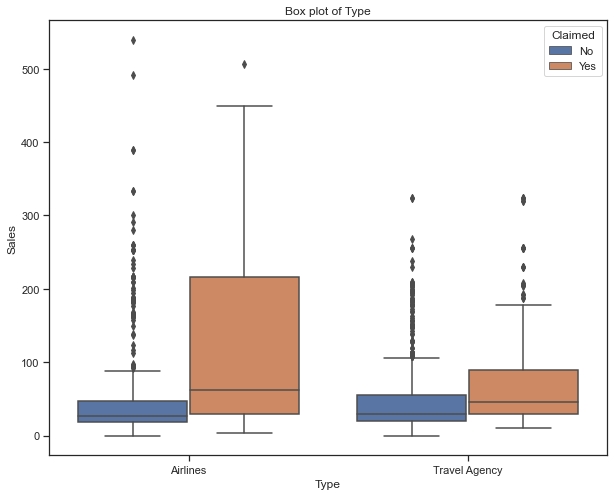

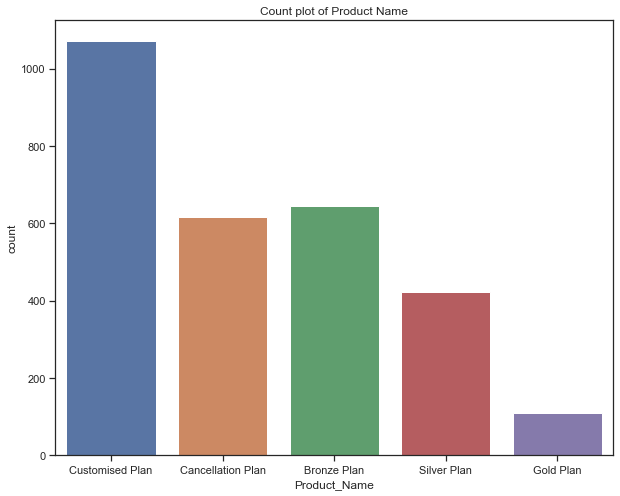

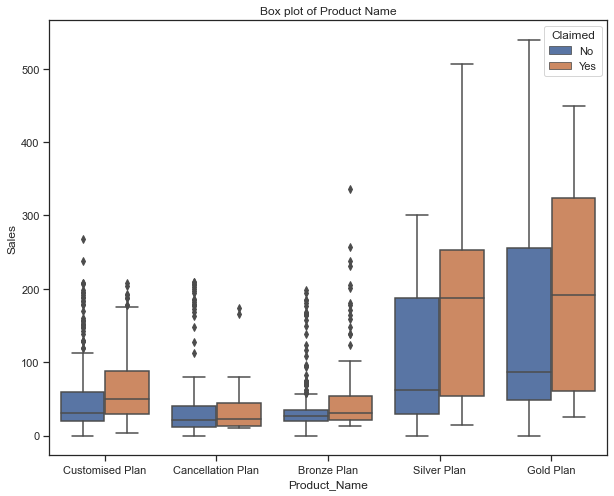

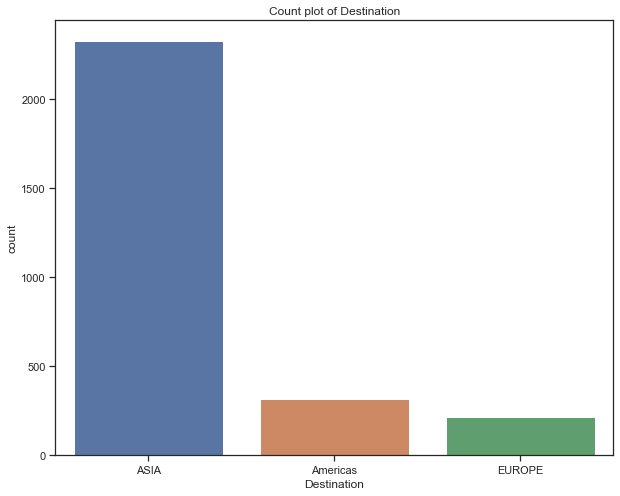

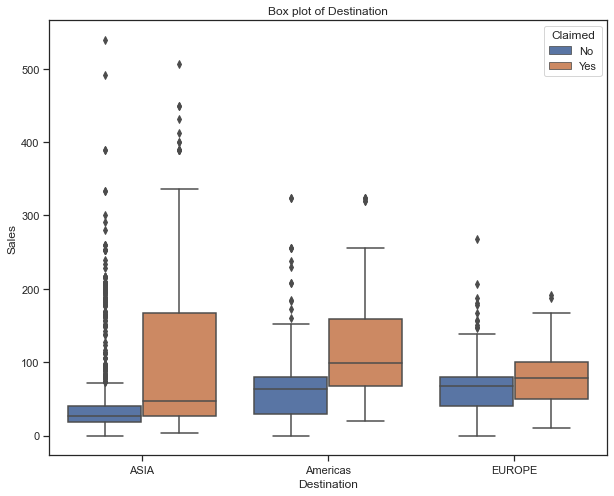

In [69]:
plt.figure(figsize=(10,8))
sns.countplot(data=claim_nd,x='Agency_Code')
plt.title("Count plot of Agency_Code")
plt.show()

print('\n')
plt.figure(figsize=(10,8))
sns.boxplot(data=claim_nd,x='Agency_Code',y='Sales',hue='Claimed')
plt.title("Box plot of Agency_Code")
plt.show()

print('\n')
plt.figure(figsize=(10,8))
sns.countplot(data=claim_nd,x='Type')
plt.title("Count plot of Type")
plt.show()

print('\n')
plt.figure(figsize=(10,8))
sns.boxplot(data=claim_nd,x='Type',y='Sales',hue='Claimed')
plt.title("Box plot of Type")
plt.show()

print('\n')
plt.figure(figsize=(10,8))
sns.countplot(data=claim_nd,x='Product_Name')
plt.title("Count plot of Product Name")
plt.show()

print('\n')
plt.figure(figsize=(10,8))
sns.boxplot(data=claim_nd,x='Product_Name',y='Sales',hue='Claimed')
plt.title("Box plot of Product Name")
plt.show()

print('\n')
plt.figure(figsize=(10,8))
sns.countplot(data=claim_nd,x='Destination')
plt.title("Count plot of Destination")
plt.show()

print('\n')
plt.figure(figsize=(10,8))
sns.boxplot(data=claim_nd,x='Destination',y='Sales',hue='Claimed')
plt.title("Box plot of Destination")
plt.show()

## Data Encoding

In [70]:
for feature in claim_nd.columns: 
    if claim_nd[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(claim_nd[feature].unique()))
        print(pd.Categorical(claim_nd[feature].unique()).codes)
        claim_nd[feature] = pd.Categorical(claim_nd[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product_Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [71]:
claim_nd.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


## Outlier Treatment

In [72]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [73]:
for feature in claim_nd[['Age', 'Commision', 'Duration', 'Sales']]: 
    lr,ur=treat_outlier(claim_nd[feature])
    claim_nd[feature]=np.where(claim_nd[feature]>ur,ur,claim_nd[feature])
    claim_nd[feature]=np.where(claim_nd[feature]<lr,lr,claim_nd[feature])

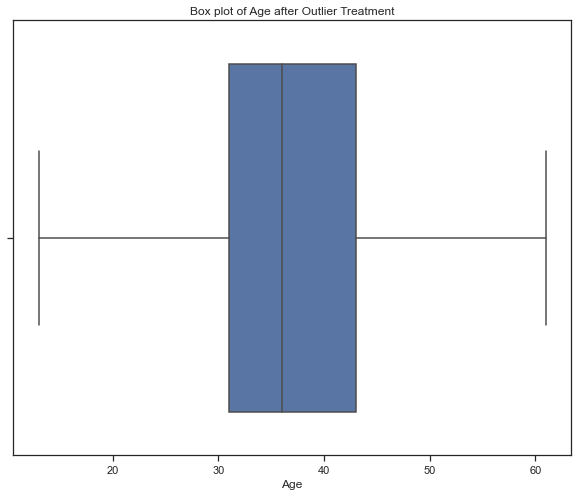

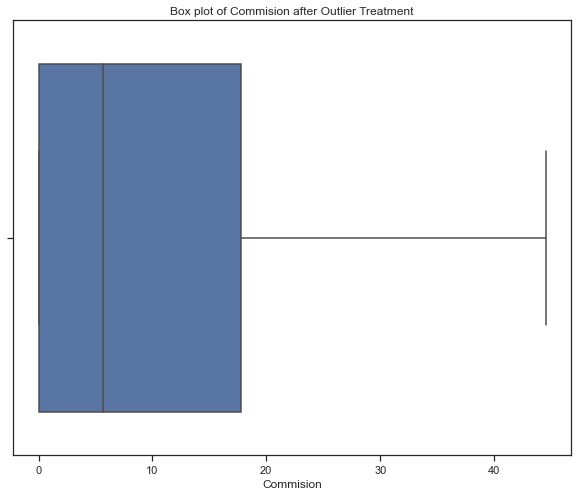

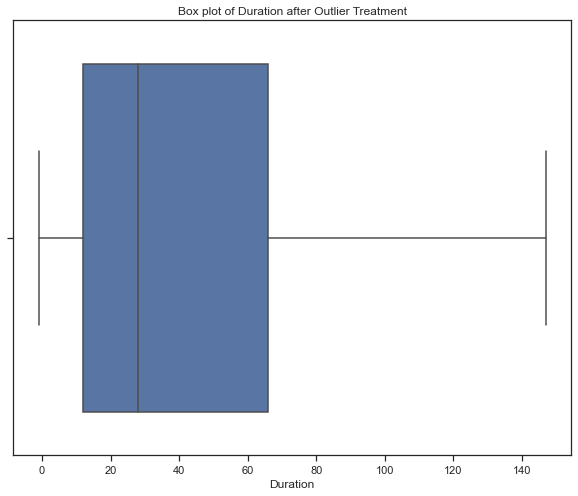

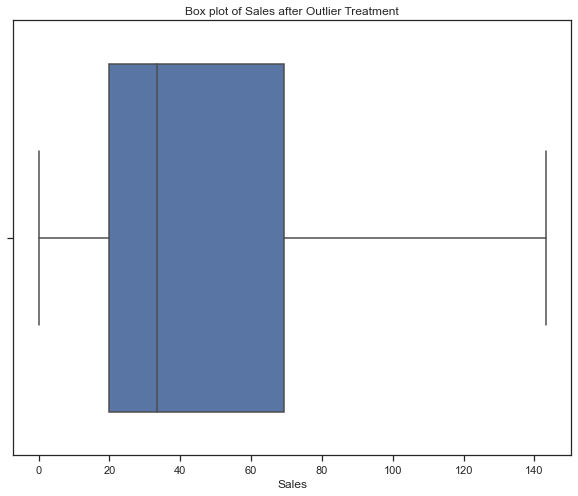

In [74]:
plt.figure(figsize=(10,8))
sns.boxplot('Age', data=claim_nd,orient='h')
plt.title("Box plot of Age after Outlier Treatment")
plt.show()

print('\n')
plt.figure(figsize=(10,8))
sns.boxplot('Commision', data=claim_nd,orient='h')
plt.title("Box plot of Commision after Outlier Treatment")
plt.show()

print('\n')
plt.figure(figsize=(10,8))
sns.boxplot('Duration', data=claim_nd,orient='h')
plt.title("Box plot of Duration after Outlier Treatment")
plt.show()

print('\n')
plt.figure(figsize=(10,8))
sns.boxplot('Sales', data=claim_nd,orient='h')
plt.title("Box plot of Sales after Outlier Treatment")
plt.show()

In [75]:
claim_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product_Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 193.1 KB


## Splitting the data into Train and Test set

In [76]:
X=claim_nd.drop("Claimed",axis=1)
y=claim_nd.pop("Claimed")

In [77]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [78]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("train_labels",train_labels.shape)
print("test_labels",test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


## CART MODEL

In [79]:
dtc=DecisionTreeClassifier(random_state=123)

In [80]:
dtc.fit(X_train,train_labels)

DecisionTreeClassifier(random_state=123)

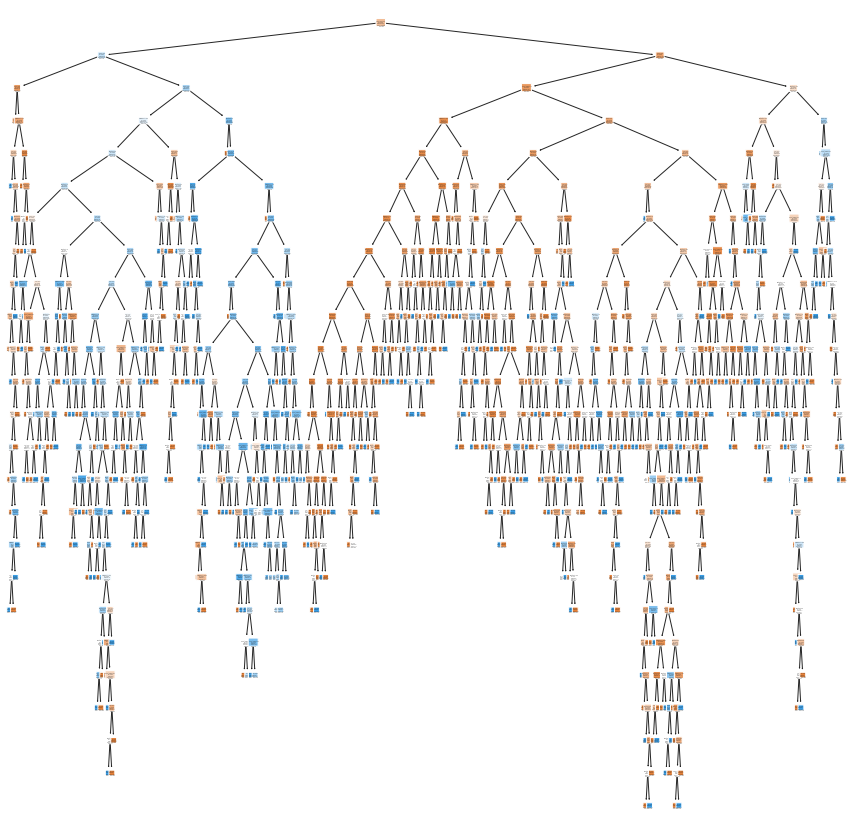

In [81]:
plt.figure(figsize=(15,15))
plot_tree(dtc,filled=True,rounded=True,class_names=["No","Yes"],feature_names=claim_nd.columns);

In [82]:
Claim_Tree_File = open('d:\Courses\PGPDSBA\Data Mining\Graded Project\Claim_tree.dot','w')
dot_data = tree.export_graphviz(dtc, 
                                out_file=Claim_Tree_File,
                                feature_names = list(X_train),
                                class_names=["No","Yes"])

Claim_Tree_File.close()

In [83]:
print(pd.DataFrame(dtc.feature_importances_,columns=['IMP'],index=X_train.columns).sort_values('IMP',ascending=False))

                   IMP
Duration      0.252263
Sales         0.221316
Age           0.204554
Agency_Code   0.176525
Commision     0.071808
Product_Name  0.041933
Destination   0.027175
Channel       0.004029
Type          0.000398


## Optimization using GridsearchCV

In [84]:
param_grid={
    'max_depth':[7,8,9,10],
    'min_samples_leaf':[15,20,25],
    'min_samples_split':[45,60,75]
}
dtcl=DecisionTreeClassifier(random_state=123)
grid_search=GridSearchCV(estimator=dtcl,param_grid=param_grid,cv=3)

In [85]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [86]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 45}

In [87]:
best_grid=grid_search.best_estimator_

## fitting optimized parameters into model

In [88]:
reg_dtcl=DecisionTreeClassifier(max_depth=8,
                                min_samples_leaf=20,
                                min_samples_split=45)
reg_dtcl.fit(X_train,train_labels)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=45)

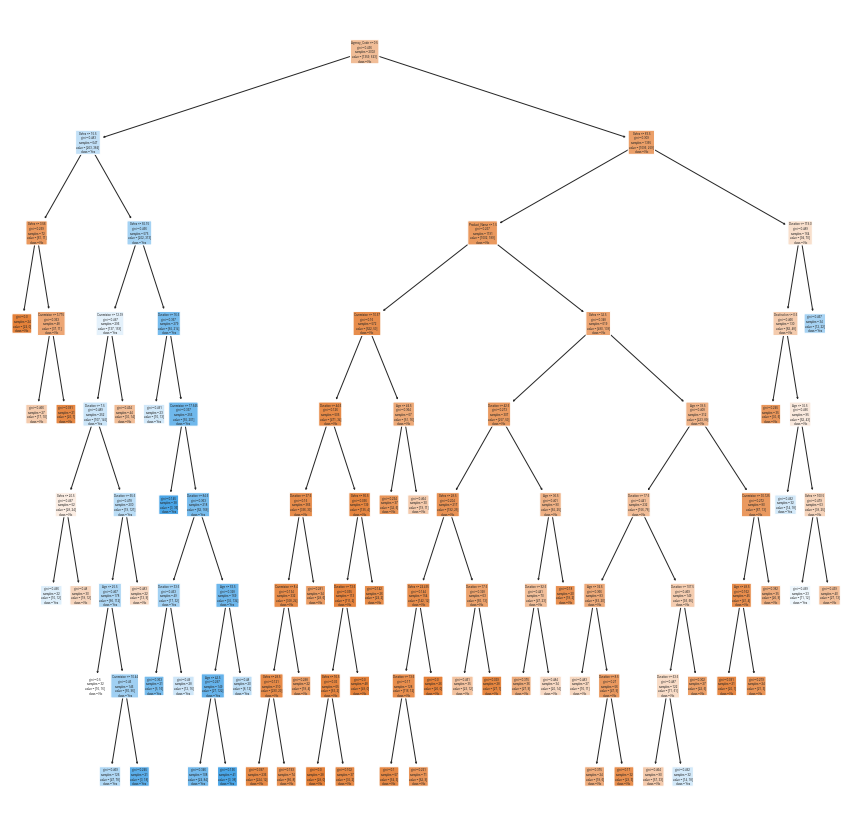

In [89]:
plt.figure(figsize=(15,15))
plot_tree(reg_dtcl,filled=True,rounded=True,class_names=["No","Yes"],feature_names=claim_nd.columns);

In [90]:
Claimreg_Tree_File = open('d:\Courses\PGPDSBA\Data Mining\Graded Project\Claim_tree_reg.dot','w')
dot_data = tree.export_graphviz(reg_dtcl, 
                                out_file=Claimreg_Tree_File,
                                feature_names = list(X_train),
                                class_names=["No","Yes"])

Claimreg_Tree_File.close()

In [91]:
print(pd.DataFrame(reg_dtcl.feature_importances_,columns=['IMP'],index=X_train.columns).sort_values('IMP',ascending=False))

                   IMP
Agency_Code   0.481977
Sales         0.264556
Duration      0.094579
Commision     0.054996
Age           0.049193
Product_Name  0.038013
Destination   0.016686
Type          0.000000
Channel       0.000000


In [92]:
dtctrain_predict = best_grid.predict(X_train)
dtctest_predict = best_grid.predict(X_test)

In [93]:
dtctest_predict_prob = best_grid.predict_proba(X_test)
dtctest_predict_prob
pd.DataFrame(dtctest_predict_prob).head()

,0,1
0,0.352941,0.647059
1,0.945946,0.054054
2,0.434783,0.565217
3,0.952381,0.047619
4,0.742857,0.257143


In [94]:
print(classification_report(train_labels,dtctrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1359
           1       0.69      0.61      0.65       643

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



In [95]:
print(classification_report(test_labels,dtctest_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       588
           1       0.62      0.55      0.59       271

    accuracy                           0.75       859
   macro avg       0.71      0.70      0.71       859
weighted avg       0.75      0.75      0.75       859



Accuracy for DecisionTreeClassifier model is 
 0.7867132867132867


Classification report for DecisionTreeClassifier Model Training Data is 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1359
           1       0.69      0.61      0.65       643

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



Confusion Matrix for DecisionTreeClassifier Model Training Data is


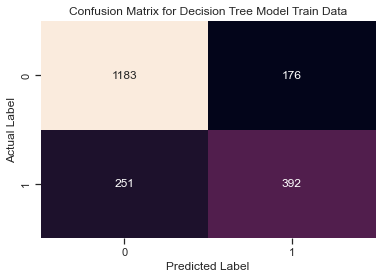

In [96]:
models_names={dtc:'DecisionTreeClassifier'}

print('Accuracy for {} model is'.format(models_names[dtc]),'\n',accuracy_score(train_labels,dtctrain_predict))
print('\n')
print('Classification report for {} Model Training Data is'.format(models_names[dtc]),'\n',
      classification_report(train_labels,dtctrain_predict))
print('\n')
print('Confusion Matrix for {} Model Training Data is'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(train_labels,dtctrain_predict),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title("Confusion Matrix for Decision Tree Model Train Data")
plt.show()

Accuracy for DecisionTreeClassifier model is 
 0.7543655413271245


Classification report for DecisionTreeClassifier Model Test Data is 
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       588
           1       0.62      0.55      0.59       271

    accuracy                           0.75       859
   macro avg       0.71      0.70      0.71       859
weighted avg       0.75      0.75      0.75       859



Confusion Matrix for DecisionTreeClassifier Model Test Data is


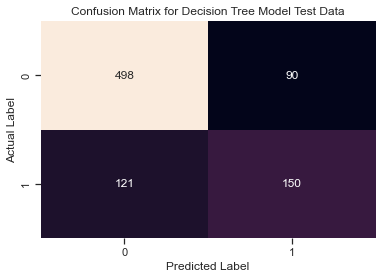

In [97]:
models_names={dtc:'DecisionTreeClassifier'}

print('Accuracy for {} model is'.format(models_names[dtc]),'\n',accuracy_score(test_labels,dtctest_predict))
print('\n')
print('Classification report for {} Model Test Data is'.format(models_names[dtc]),'\n',
      classification_report(test_labels,dtctest_predict))
print('\n')
print('Confusion Matrix for {} Model Test Data is'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(test_labels,dtctest_predict),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title("Confusion Matrix for Decision Tree Model Test Data")
plt.show()

Area under Curve is 0.846842717806639


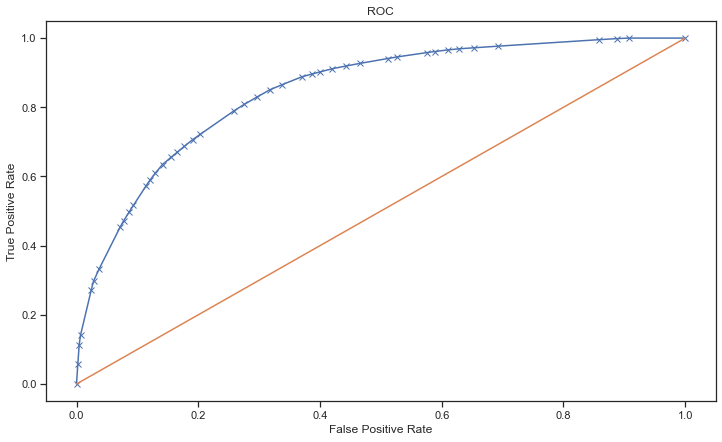

In [98]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='CART Model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Area under Curve is 0.7702669628737103


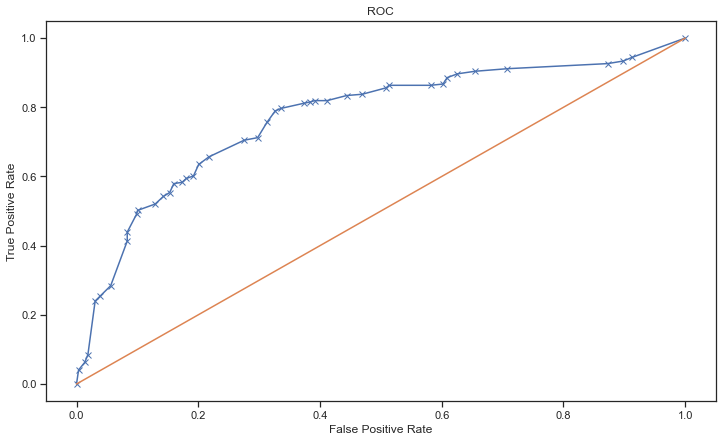

In [99]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='CART Model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## Building a Random Forest Classifier Model and fit it on the Training Set

In [100]:
rfcl=RandomForestClassifier(random_state=123)

In [101]:
rfcl.fit(X_train,train_labels)

RandomForestClassifier(random_state=123)

In [102]:
rfcl_prediction=rfcl.predict(X_train)

In [103]:
param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier(random_state=123)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [104]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [105]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 200}

In [106]:
best_grid = grid_search.best_estimator_

In [107]:
rfcltrain_predict = best_grid.predict(X_train)
rfcltest_predict = best_grid.predict(X_test)

In [108]:
rfcltest_predict_prob = best_grid.predict_proba(X_test)
rfcltest_predict_prob
pd.DataFrame(rfcltest_predict_prob).head()

,0,1
0,0.537517,0.462483
1,0.927575,0.072425
2,0.330638,0.669362
3,0.830076,0.169924
4,0.745457,0.254543


Accuracy for RandomForestClassifier model is 
 0.8001998001998002


Classification report for RandomForestClassifier Model Training Data is 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1359
           1       0.74      0.59      0.65       643

    accuracy                           0.80      2002
   macro avg       0.78      0.74      0.76      2002
weighted avg       0.79      0.80      0.79      2002



Confusion Matrix for RandomForestClassifier Model Training Data is


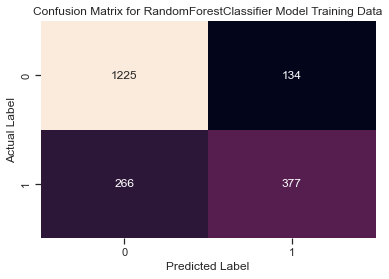

In [109]:
models_names={dtc:'DecisionTreeClassifier',rfcl:'RandomForestClassifier'}

print('Accuracy for {} model is'.format(models_names[rfcl]),'\n',accuracy_score(train_labels,rfcltrain_predict))
print('\n')
print('Classification report for {} Model Training Data is'.format(models_names[rfcl]),'\n',classification_report(
    train_labels,rfcltrain_predict))
print('\n')
print('Confusion Matrix for {} Model Training Data is'.format(models_names[rfcl]))
sns.heatmap(confusion_matrix(train_labels,rfcltrain_predict),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for {} Model Training Data'.format(models_names[rfcl]))
plt.show()

Accuracy for RandomForestClassifier model is 
 0.7834691501746216


Classification report for RandomForestClassifier Model Testing Data is 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       588
           1       0.70      0.55      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.78      0.78      0.78       859



Confusion Matrix for RandomForestClassifier Model Testing Data is


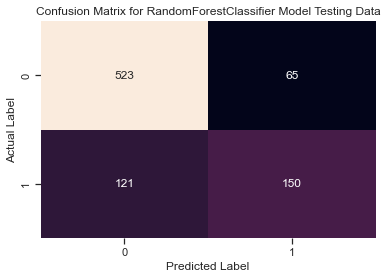

In [110]:
models_names={dtc:'DecisionTreeClassifier',rfcl:'RandomForestClassifier'}

print('Accuracy for {} model is'.format(models_names[rfcl]),'\n',accuracy_score(test_labels,rfcltest_predict))
print('\n')
print('Classification report for {} Model Testing Data is'.format(models_names[rfcl]),'\n',classification_report(
    test_labels,rfcltest_predict))
print('\n')
print('Confusion Matrix for {} Model Testing Data is'.format(models_names[rfcl]))
sns.heatmap(confusion_matrix(test_labels,rfcltest_predict),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for {} Model Testing Data'.format(models_names[rfcl]))
plt.show()

Area under Curve is 0.8655716111814903


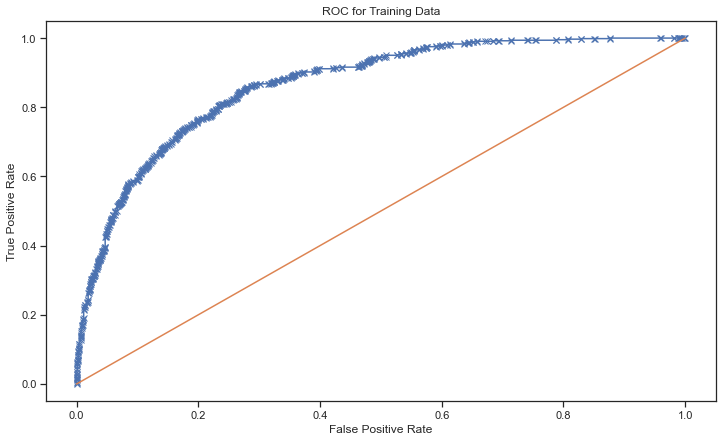

In [111]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Training Data')
plt.show()

Area under Curve is 0.8169635012676657


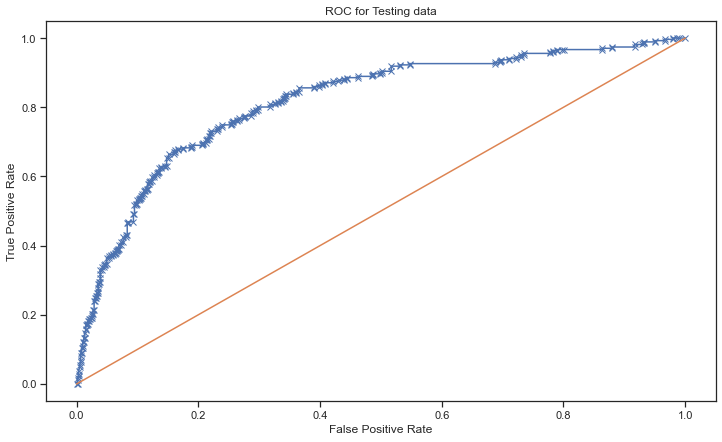

In [112]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Testing data')
plt.show()

## Building an ANN Model and fit it on the Training Set

In [113]:
sc=StandardScaler()

In [114]:
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled

array([[ 2.35126368, -1.2626112 , -1.19813318, ..., -0.84677146,
        -1.31338076, -0.44775345],
       [-0.20384732,  0.71683095,  0.83463176, ..., -0.37328775,
         0.24339146, -0.44775345],
       [ 2.24905924, -0.27289013,  0.83463176, ...,  0.43873682,
         0.24339146,  1.24676906],
       ...,
       [-0.20384732,  0.71683095,  0.83463176, ..., -0.89411983,
        -0.53499465, -0.44775345],
       [-0.20384732,  0.71683095,  0.83463176, ...,  1.44962454,
         0.24339146, -0.44775345],
       [-0.20384732,  0.71683095,  0.83463176, ...,  1.44962454,
         0.24339146,  1.24676906]])

In [115]:
X_test_scaled = sc.transform(X_test)
X_test_scaled

array([[-0.71486952, -0.27289013,  0.83463176, ...,  1.09451176,
         0.24339146, -0.44775345],
       [ 2.35126368,  0.71683095,  0.83463176, ..., -0.51533286,
        -0.53499465, -0.44775345],
       [ 0.40937932, -1.2626112 , -1.19813318, ...,  0.78674734,
         1.80016368, -0.44775345],
       ...,
       [ 1.32921928, -1.2626112 , -1.19813318, ..., -0.82309727,
        -1.31338076, -0.44775345],
       [ 1.53362816,  0.71683095,  0.83463176, ..., -0.70472634,
         0.24339146, -0.44775345],
       [-0.20384732,  0.71683095,  0.83463176, ..., -0.70472634,
         0.24339146, -0.44775345]])

In [116]:
mlp=MLPClassifier(hidden_layer_sizes=(500),solver='sgd',random_state=123,max_iter=500)

In [117]:
mlp.fit(X_train_scaled,train_labels)

MLPClassifier(hidden_layer_sizes=500, max_iter=500, random_state=123,
              solver='sgd')

In [118]:
prediction_ann=mlp.predict(X_train_scaled)
prediction_ann

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [119]:
param_grid = {
    'hidden_layer_sizes': [(500,500,500)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, cv = 3)

In [120]:
grid_search.fit(X_train_scaled, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(500, 500, 500)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [121]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (500, 500, 500),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [122]:
best_grid = grid_search.best_estimator_

In [123]:
mlptrain_predict = best_grid.predict(X_train_scaled)
mlptest_predict = best_grid.predict(X_test_scaled)

Accuracy for ANN model is 
 0.7662337662337663


Classification report for ANN Model Training Data is 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1359
           1       0.65      0.60      0.62       643

    accuracy                           0.77      2002
   macro avg       0.73      0.72      0.73      2002
weighted avg       0.76      0.77      0.76      2002



Confusion Matrix for ANN Model Training Data is


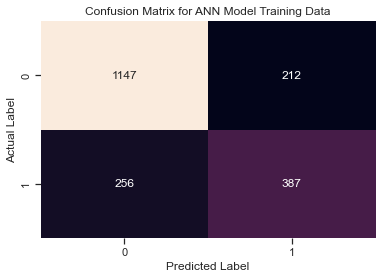

In [124]:
models_names={dtc:'DecisionTreeClassifier',rfcl:'RandomForestClassifier',mlp:'ANN'}

print('Accuracy for {} model is'.format(models_names[mlp]),'\n',accuracy_score(train_labels,mlptrain_predict))
print('\n')
print('Classification report for {} Model Training Data is'.format(models_names[mlp]),'\n',classification_report(train_labels,mlptrain_predict))
print('\n')
print('Confusion Matrix for {} Model Training Data is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(train_labels,mlptrain_predict),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for {} Model Training Data'.format(models_names[mlp]))
plt.show()

Accuracy for ANN model is 
 0.7671711292200233


Classification report for ANN Model Testing Data is 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       588
           1       0.64      0.61      0.62       271

    accuracy                           0.77       859
   macro avg       0.73      0.72      0.73       859
weighted avg       0.76      0.77      0.77       859



Confusion Matrix for ANN Model Testing Data is


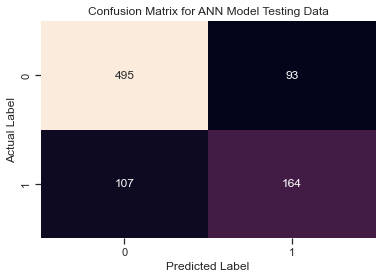

In [125]:
models_names={dtc:'DecisionTreeClassifier',rfcl:'RandomForestClassifier',mlp:'ANN'}

print('Accuracy for {} model is'.format(models_names[mlp]),'\n',accuracy_score(test_labels,mlptest_predict))
print('\n')
print('Classification report for {} Model Testing Data is'.format(models_names[mlp]),'\n',classification_report(test_labels,mlptest_predict))
print('\n')
print('Confusion Matrix for {} Model Testing Data is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(test_labels,mlptest_predict),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for {} Model Testing Data'.format(models_names[mlp]))
plt.show()

Area under Curve is 0.8201031771371549


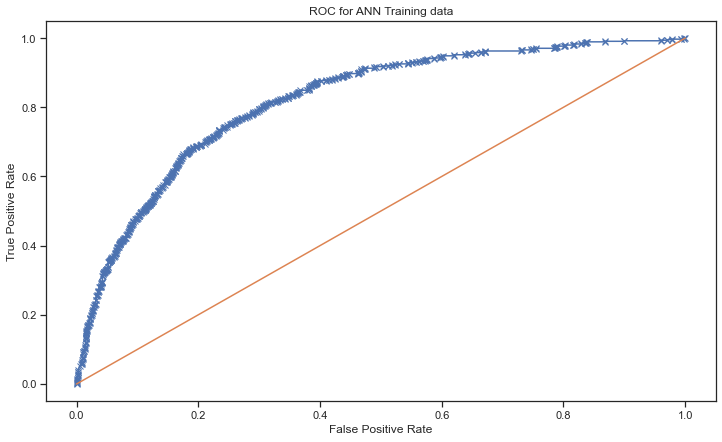

In [126]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train_scaled)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='ANN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train_scaled)[:,1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for ANN Training data')
plt.show()

Area under Curve is 0.814468961016141


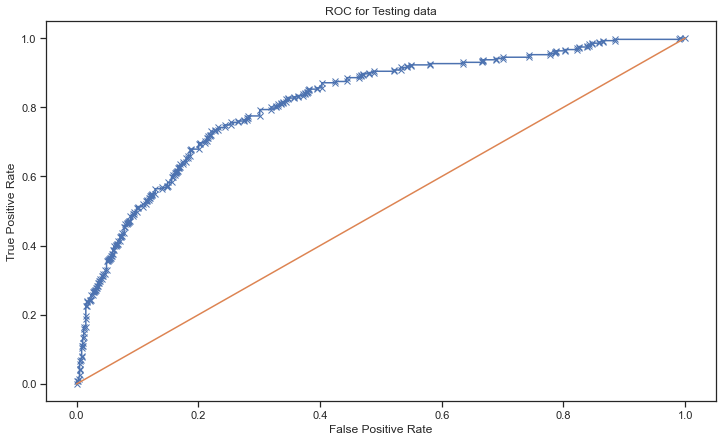

In [127]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='ANN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test_scaled)[:,1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Testing data')
plt.show()

Area under the curve for Decision Tree Classification Model is 0.7702669628737103
Area under the curve for Random Forest Classification Model is 0.8169635012676657
Area under the curve for Artificial Neural Network Model is 0.814468961016141


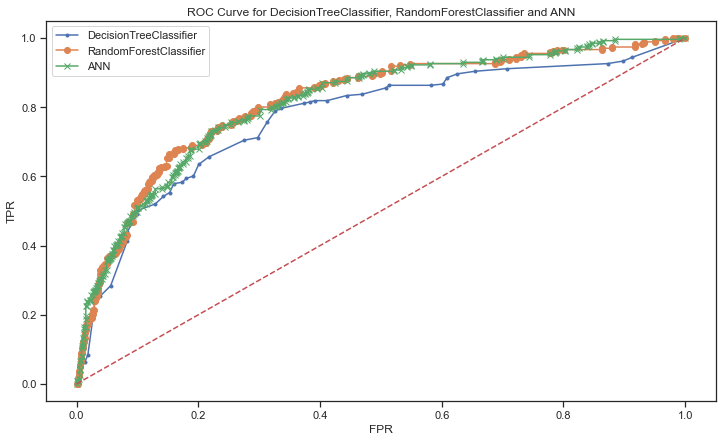

In [130]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(test_labels,
                                                                                     dtctest_predict_prob[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(test_labels,
                                                                                     rfcltest_predict_prob[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(test_labels,
                                                                                  best_grid.predict_proba(X_test_scaled)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(test_labels, dtctest_predict_prob[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfcl, tpr_rfcl, thresholds = roc_curve(test_labels, rfcltest_predict_prob[:,1])
plt.plot(fpr_rfcl, tpr_rfcl, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(test_labels,best_grid.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()